In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 981 kB 45.2 MB/s 
     |████████████████████████████████| 263 kB 44.3 MB/s 
     |████████████████████████████████| 3.8 MB 44.2 MB/s 
     |████████████████████████████████| 1.3 MB 38.2 MB/s 
     |████████████████████████████████| 468 kB 41.0 MB/s 
     |████████████████████████████████| 101 kB 11.7 MB/s 
     |████████████████████████████████| 6.6 MB 46.9 MB/s 
     |████████████████████████████████| 880 kB 52.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.7-py3-none-any.whl size=25312842 sha256=fa0a16152b7c948a6e3d5784920f3f51f89c1aca362a2ed95e361c6624d40184
  Stored in directory: /root/.cache/pip/wheels/e5/98/8e/ce355dcb92451e85fab93f7ea2da068843e93e703928cd06fb
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=ba6dbaa6d6de4c9f4ef40418

In [ ]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !cp '/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx' './train.xlsx'

In [ ]:
# /content/IMDB-Movie-Reviews-Large-Dataset-50k

In [ ]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf
# from transformers import TFAutoModelForSequenceClassification

In [ ]:
data_test = pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx', dtype= str)
data_train = pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx', dtype = str)

In [ ]:
data_train.sample(5)

,Reviews,Sentiment
5624,I'm from Romania i'll try to speak in English....,pos
15166,The Little Mermaid is one of my absolute favor...,neg
3339,Overall I would have to say that I liked the m...,pos
17693,"This film is not morbid, nor is it depressing....",pos
4124,"Vivacious & irrepressible, ANNE OF GREEN GABLE...",pos


In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


# BERT-Base

In [ ]:
(train, val, preproc) = text.texts_from_df(train_df = data_train, 
                                           text_column = 'Reviews', 
                                           label_columns = 'Sentiment', 
                                           val_df = data_test,
                                           maxlen = 512, #reduce to maybe 400 for training time reduction, but not in production
                                           preprocess_mode = 'bert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = ktrain.load_predictor('/content/gdrive/MyDrive/BERT_IMDB_Movie_Flask').model

# re-instantiate Learner and training
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=6)
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
3125/3125 [==============================] - 2851s 908ms/step - loss: 0.0649 - accuracy: 0.9794 - val_loss: 0.0205 - val_accuracy: 0.9948


In [ ]:
model = text.text_classifier(name = 'bert', train_data = train, preproc=preproc)

Is Multi-Label? False
maxlen is 512
done.


In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = train,
                             val_data = val,
                             batch_size = 6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
4167/4167 [==============================] - 791s 185ms/step - loss: 2.9326 - accuracy: 0.6137


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


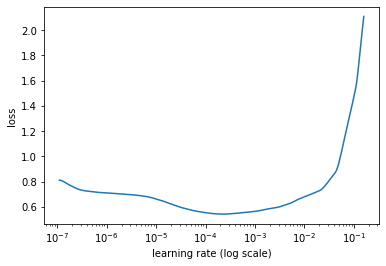

In [ ]:
#found the best learning rate
# learner.lr_find()
# learner.lr_plot()

#could take hours to days

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
2815/4167 [===================>..........] - ETA: 12:03 - loss: 0.6938 - accuracy: 0.4930

In [ ]:
# learner.fit_onecycle(lr = 2e-4, epochs=2)



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/2
4167/4167 [==============================] - 2977s 710ms/step - loss: 0.4773 - accuracy: 0.7351 - val_loss: 0.7438 - val_accuracy: 0.5000
Epoch 2/2
4167/4167 [==============================] - 2957s 710ms/step - loss: 0.7001 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# learner.fit_onecycle(lr = 2e-3, epochs=2)



begin training using onecycle policy with max lr of 0.002...
Epoch 1/2
4167/4167 [==============================] - 2956s 709ms/step - loss: 0.7709 - accuracy: 0.4937 - val_loss: 0.7467 - val_accuracy: 0.5000
Epoch 2/2
4167/4167 [==============================] - 2956s 709ms/step - loss: 0.7628 - accuracy: 0.5012 - val_loss: 0.6933 - val_accuracy: 0.5000


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
predictor.save('/content/drive/My Drive/BERT_IMDB_Movie_Flask')

In [ ]:
# data = ['This movie was really bad. Acting was also bad.', 
        # 'This movie was really great. I will see it again',
        # 'Another great movie. A must watch']

In [ ]:
# predictor.predict(data)

In [ ]:
# predictor.get_classes()

In [ ]:
# predictor.predict(data, return_proba=True)

In [ ]:
# predictor.predict(data[0])

# Visualizations with kgp

In [ ]:
import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-gsnuwo7q
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-gsnuwo7q
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=4a73e1aa19941eacbcfed92c1af3aaef292e873d09f8064f361a7f7ec0d399f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-s_wvzsd2/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as kgp

In [ ]:
data = kgp.get_basic_features(train_data)

NameError: ignored

In [ ]:
plt.style.use('ggplot')

In [ ]:
sns.countplot('sentiment', data = data)
plt.title('Positive or Negative')

AttributeError: ignored

In [ ]:
data['sentiment'].value_counts().plot.pie(autopct = '%1.2f%%')

TypeError: ignored

In [ ]:
sns.kdeplot(data[data['sentiment'] == 1]['char_counts'], shade = True, color = 'red') #disaster
sns.kdeplot(data[data['sentiment'] == 0]['char_counts'], shade = True, color = 'blue')

TypeError: ignored

## Word Cloud

In [ ]:
real = kgp.get_word_freqs(data_train[data['target']==1], 'text')
real = ' '.join(real.index)
real

In [ ]:
word_cloud = WordCloud(max_font_size=100).generate(real) #already present in pandas
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Voilin

In [ ]:
sns.catplot(y = 'char_counts', data = data, kind = 'violin', col = 'target')